<a href="https://colab.research.google.com/github/lajmej/CursoGit2024/blob/master/Stylized_fact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color = #000066 size=7> Métodos Cuantitativos en Finanzas - FC  </font>

<br><font color = #000000 size=6.5> Stylized Facts </font>

 <br><font color = silver size=5> Author: Luis Pavón, MSc, CQF </font>
 <br><font color = silver size=3> <luis_lept03@ciencias.unam.mx> </font>
 <br><font color = silver size=2> September,2022 </font>

***

In [1]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import yahoo finance library
import yfinance as yf

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import scipy.stats for kurtosis, skew
from scipy.stats import kurtosis, skew

# Import scipy.stats for QQ-plot
from scipy import stats
import matplotlib.pyplot as plt

# Import scipy.stats for ACF
from statsmodels.graphics.tsaplots import plot_acf

## Data extraction

In [5]:
# Fetch data by specifying the the start and end dates
df = yf.download('TSM', start='2008-01-01', end='2024-03-05', progress=False)

# Display the first five rows of the dataframe to check the results.
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,9.791045,9.850746,9.442786,9.522388,5.551019,13048015
2008-01-03,9.452736,9.592040,9.353234,9.393035,5.475612,10655211
2008-01-04,9.353234,9.412935,8.855721,8.885572,5.179790,20526421
2008-01-07,8.955224,8.955224,8.587065,8.706468,5.075381,18029800
2008-01-08,8.716418,8.925373,8.656716,8.716418,5.081182,18814906
...,...,...,...,...,...,...
2024-02-27,130.770004,131.970001,128.589996,128.589996,128.589996,8851800
2024-02-28,128.500000,128.580002,126.650002,127.379997,127.379997,6519100
2024-02-29,128.029999,129.190002,127.150002,128.669998,128.669998,9369900


In [6]:
# Fetch data by specifying the the start and end dates
df = yf.download('TSM', start='2008-01-01', end='2022-09-12', progress=False)['Close']

# Display the first five rows of the dataframe to check the results.
df

Date
2008-01-02     9.522388
2008-01-03     9.393035
2008-01-04     8.885572
2008-01-07     8.706468
2008-01-08     8.716418
                ...    
2022-09-02    80.900002
2022-09-06    80.029999
2022-09-07    79.949997
2022-09-08    80.239998
2022-09-09    81.529999
Name: Close, Length: 3699, dtype: float64

## Evolution: SPY

In [7]:
df.iplot(kind='line',title='SPY Price')

In [8]:
# Calculating Log Normal Returns

# Use numpy log function to derive log normal returns
daily_returns = np.log(df).diff().dropna()

# Display the last five rows of the data frame to check the output
daily_returns.head(5)

Date
2008-01-03   -0.013677
2008-01-04   -0.055540
2008-01-07   -0.020363
2008-01-08    0.001142
2008-01-09    0.033673
Name: Close, dtype: float64

## Log-Return: SPY

In [10]:
# Plot Returns
daily_returns.iplot(title='Daily Log Returns')

## Histogram: SPY

In [11]:
# Plot log normal distribution of returns
daily_returns.iplot(kind='histogram', title = 'Histogram of Daily Returns')

## Moments: SPY

In [12]:
# Compute mean, Standard deviation, and skew
# Kurtosis (If True, Fisher’s definition is used (normal ==> 0.0). If False, Pearson’s definition is used (normal ==> 3.0).)
pd.DataFrame({'Mean': round(np.mean(daily_returns),5),'SD': round(np.std(daily_returns),5),'Kurtosis':round(kurtosis(daily_returns,fisher=True),5),'Skew':round(skew(daily_returns),5)},index={'Statistics'})

ValueError: index cannot be a set

## QQ-Plot: SPY

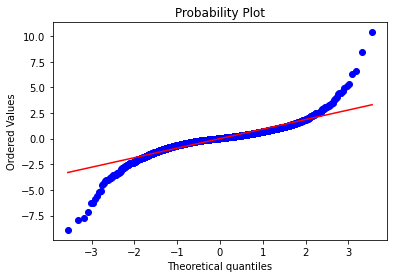

In [ ]:
stats.probplot((daily_returns-np.mean(daily_returns))/np.std(daily_returns), dist="norm", plot=plt)
plt.show()

## ACF: SPY

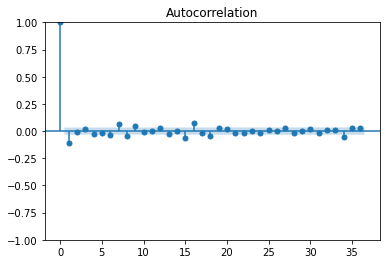

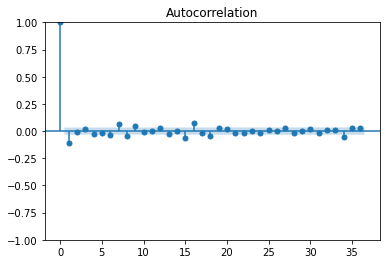

In [ ]:
# plot the auto correlation
plot_acf(daily_returns)

## ACF: Absolute-SPY

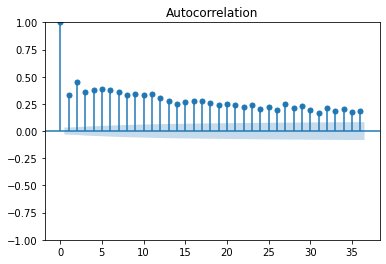

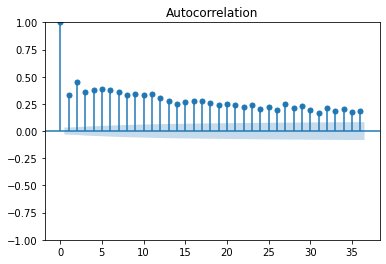

In [ ]:
# plot the auto correlation
plot_acf(np.abs(daily_returns))

## Re-Sampling: SPY

In [ ]:
# Resampling to derive weekly values from daily time series
df_weekly = df.resample('W').last()

# Display the last five rows of the data frame to check the output
df_weekly

Date
2008-01-06    141.309998
2008-01-13    140.149994
2008-01-20    132.059998
2008-01-27    133.039993
2008-02-03    139.580002
                 ...    
2022-08-14    427.100006
2022-08-21    422.140015
2022-08-28    405.309998
2022-09-04    392.239990
2022-09-11    406.600006
Freq: W-SUN, Name: Close, Length: 767, dtype: float64

In [ ]:
# Resampling to derive monthly values from daily time series
df_monthly = df.resample('M').last()

# Display the last five rows of the data frame to check the output
df_monthly

Date
2008-01-31    137.369995
2008-02-29    133.820007
2008-03-31    131.970001
2008-04-30    138.259995
2008-05-31    140.350006
                 ...    
2022-05-31    412.929993
2022-06-30    377.250000
2022-07-31    411.989990
2022-08-31    395.179993
2022-09-30    406.600006
Freq: M, Name: Close, Length: 177, dtype: float64

In [ ]:
# Resampling to a specific day of the week: Thursday
df_weekly_thu = df.resample('W-THU').ffill()

# Display the last five rows of the data frame to check the output
df_weekly_thu.tail()

Date
2022-08-18    427.890015
2022-08-25    419.510010
2022-09-01    396.420013
2022-09-08    400.380005
2022-09-15    406.600006
Freq: W-THU, Name: Close, dtype: float64